# Usiminas: Residência em Ciência de Dados

**Disciplina:** Probabilidade e Análise de Dados com Python

**Professores:** Flávio Figueiredo e Pedro Melo

**Aula 6:** Análise exploratória de dados e visualizações com Seaborn e Plotly 

Na aula de hoje, vimos como construir diversos tipos de visualizações utilizando as bibliotecas `seaborn`e `plotly`. Aqui, colocaremos em prática o que aprendemos para gerar e analisar visualizações com essas ferramentas.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Questão 1 - Reconstrua o gráfico de pontos mostrado abaixo.

![img1](https://github.com/fccarvalho2/Viz/blob/main/graph.png?raw=true)

**Informações adicionais:** Para este plot, utilizaremos somente os diamantes da melhor classe de cores (D) do conjunto de dados "Diamonds", que já está incluindo na bibloteca `seaborn`. Você precisará utilizar as funções da biblioteca `pandas` para selecionar as linhas que atendem a este critério. Lembre-se de escolher dimensões apropriadas para sua figura.

In [5]:
#Importando e visualizando o conjunto de dados
diamonds = sns.load_dataset('diamonds')
diamonds_d = diamonds.query('color == "D"')
diamonds_d

,carat,cut,color,clarity,depth,table,price,x,y,z
28,0.23,Very Good,D,VS2,60.5,61.0,357,3.96,3.97,2.40
34,0.23,Very Good,D,VS1,61.9,58.0,402,3.92,3.96,2.44
38,0.26,Very Good,D,VS2,60.8,59.0,403,4.13,4.16,2.52
42,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
43,0.26,Good,D,VS1,58.4,63.0,403,4.19,4.24,2.46
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


<Axes: xlabel='table', ylabel='price'>

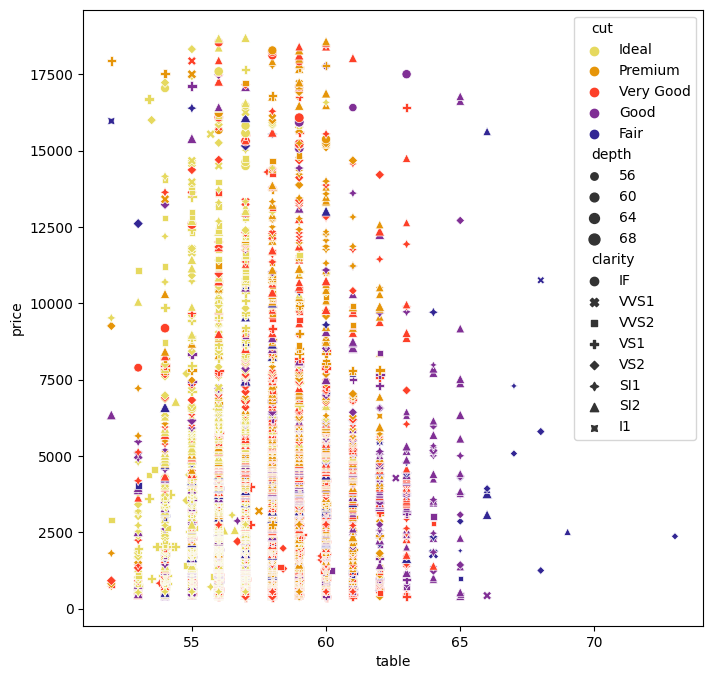

In [6]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="table", y="price", hue="cut", size="depth", style="clarity", palette='CMRmap_r', data=diamonds_d)

**Pergunta:** Analisando a figura, qual par de variáveis (dentre as mostradas) parece estar mais fortemente associado?

**Resposta:** 

### Questão 2 - Reconstrua o violin plot a seguir.


![violin plot](https://github.com/fccarvalho2/Viz/blob/main/graph2.png?raw=true)

**Informações adicionais:** Para este plot, utilizaremos o conjunto de dados "tips" em sua totalidade. Este _dataset_ já está incluindo por padrão na bibloteca `seaborn` e pode ser importado como um dataframe `pandas` utilizando o comando `sns.load_dataset('tips')`.

In [ ]:
#Importando e visualizando o conjunto de dados
tips = sns.load_dataset('tips')
tips

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(data=tips, x = "day", y = "tip", hue="smoker", split=True,
               inner="quartile", linewidth=1, palette='BrBG_r')

Analisando a visualização construída, podemos obter as respostas para algumas perguntas, incluindo, mas não limitando-se a:

1. Fumantes (_smoker_=_Yes_) tendem a pagar melhores gorgetas?
2. Em qual dia da semana as gorgetas são melhores?
3. Em qual dia da semana se observou a maior gorgeta? 

Com base nisso, modifique a visualização acima para responder às seguintes perguntas:

1. Há uma diferença significativa no total das contas (_total_bill_) pagos por homens e mulheres?
2. Os clientes tendem a gastar mais no almoço ou no jantar?

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.violinplot(data = tips, x = "time", y = "tip", hue="sex", split=True,
               inner="quartile", linewidth=1, palette='BrBG_r')

### Questão 3 - Construa um  mapa de calor utilizando o conjunto de dados _diamonds_.

**Informações adicionais:** Conjunto de dados muito grandes podem dificultar a criação de visualizações efetivas. Este é o caso do conjunto diamonds, que possui mais de 53 mil entradas. Para situações como esta, a análise de informações estatísticas (como as correlações) dos dados é muito importante durante a etapa de análise exploratória dos dados, e nos ajuda a criar visualizações mais eficientes. Utilizando as bibliotecas `pandas` e `seaborn`, constura um mapa de calor representando as correlações entre as diversas variáveis numéricas deste conjunto de dados.


In [ ]:
sns.heatmap(data = diamonds.corr(), cmap='Blues', cbar=False, annot=True, linecolor='k', linewidths=2)

**a)** Construa agora uma matriz de _scatterplots_. Qual destas visualizações lhe parece mais efetiva?

In [ ]:
sns.pairplot(data=diamonds, hue='color', x_vars= ['carat','depth',	'table',	'price',	'x',	'y',	'z'],
             y_vars=['carat','depth',	'table',	'price',	'x',	'y',	'z'])

###  Questão 4 [Desafio] - Construindo animações com Plotly

O Gapminder é uma instituição sem afiliações políticas, econômicas ou religiosas, que tem como o objetivo utilizar dados reais para combater a desinformação sistemática sobre diversos aspectos globais importantes como a pobreza e desigualdades sociais. No [site da organização](https://www.gapminder.org/) são disponibilizados diversos recursos como visualizações criativas, quizes, conjuntos de dados de grande utilidade pública, dentre outros.

Uma das visualizações mais famosas criadas e divulgadas pelo Gapminder é o [Bubble chart animado](https://www.gapminder.org/tools/#$chart-type=bubbles&url=v1) que mostra como a renda e a expectativa de vida mudaram ao redor do mundo desde desde o final do século XVIII.

Apesar de bastante impactante e visualmente atraente, esta visualização de aparência complexa é mais fácil de se construir do que inicialmente podemos imaginar. Por isso, propomos aqui o desafio de reconstruir a animação utilizando os dados do gapminder e a biblioteca `plotly`. 

Observação: No gráfico mostrado no Gapminder, o eixo x está em escala logaritmica. Podemos conseguir resultados similares utilizando o parâmetro `log_x=True` na chamada de nossa função. Para ajustar o tamanho do eixo y, podemos usar ` range_y=[15,90]`.

In [ ]:
#Importando e visualizando o conjunto de dados
gapminder = px.data.gapminder()
gapminder

In [ ]:
import plotly.express as px

fig = px.scatter(data_frame=gapminder, x="gdpPercap", y="lifeExp", width=600, height=600,
                color = "continent", hover_data=['country'], 
                 range_y=[15,90], log_x = True)
fig.show()